<a href="https://colab.research.google.com/github/laylamoguibmm/Tasks/blob/main/task2_elevvopath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Mall_Customers.csv')  # Adjust path if needed
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

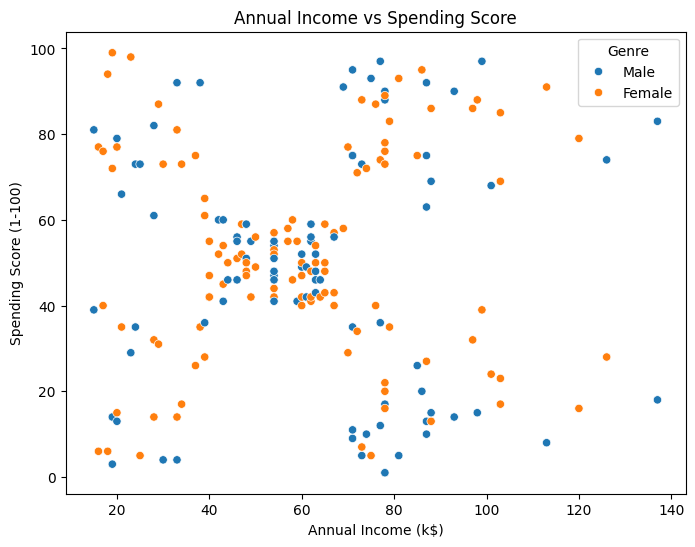

In [6]:
print(df.info())
print(df.describe())

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Annual Income vs Spending Score')
plt.show()

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

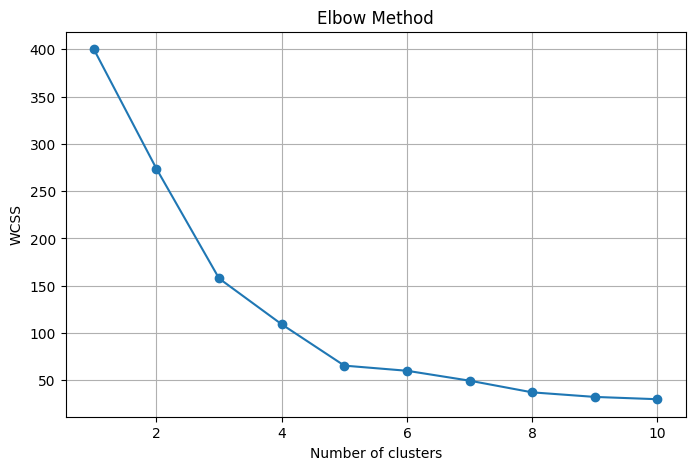

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

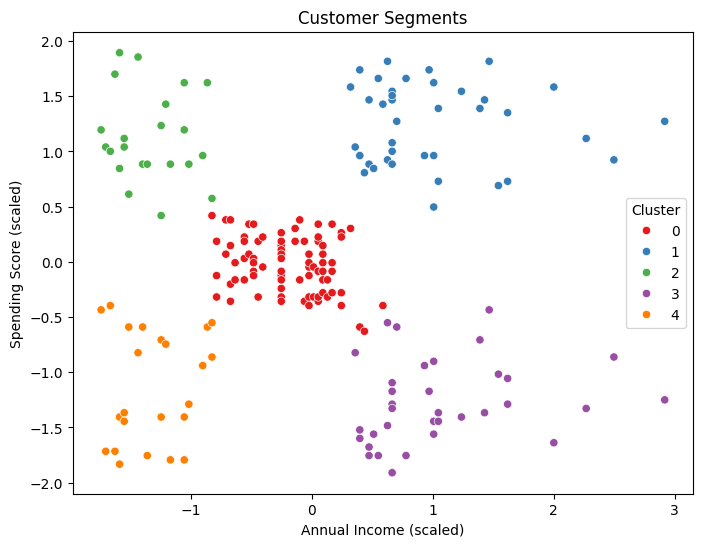

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [11]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


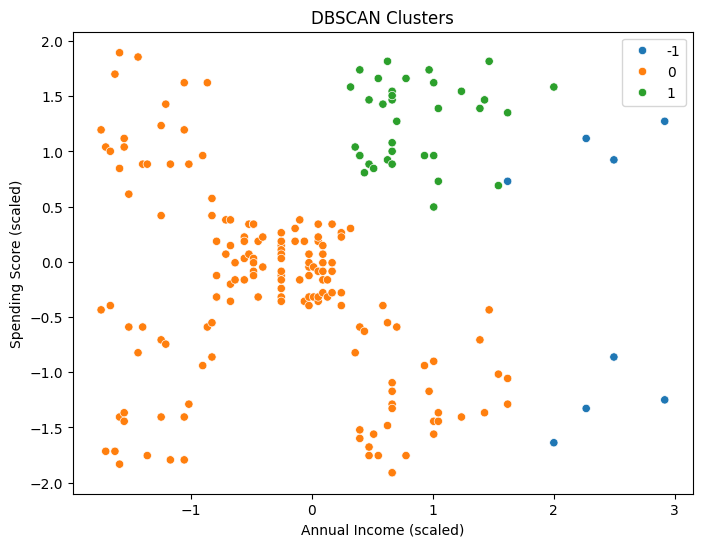

In [13]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

df['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=dbscan_labels, palette='tab10')
plt.title('DBSCAN Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [14]:
dbscan_cluster_summary = df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
dbscan_cluster_summary


,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
-1,122.750000,46.875000
0,52.490446,43.101911
1,82.542857,82.800000


In [5]:
print(df.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv
